We can start building a model using the data we've created from the previous session.

In [4]:
import pandas as pd
from sklearn import tree

In [2]:
train_df = pd.read_csv("data/Titanic/train_processed.csv")

### Prepare the data for training

The first step is to separate the training data (all the features) from the target (survival).

In [6]:
y = train_df['Survived']
x = train_df.drop(['Survived'], axis=1)

In [8]:
x.shape, y.shape

((889, 9), (889,))

Like we have discussed before, we need to split data into train/valid/test datasets. Here we need to split our training data into train/valid so we can evaluate our model performance on the validation dataset. 

You can do it by randomly setting aside 20% of data. Scikit-learn also provides a handy function for doing that.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=23, stratify=y)

### Training process

In [12]:
??tree.DecisionTreeClassifier

Init signature:
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Source:        
class DecisionTreeClassifier(ClassifierMixin, BaseDecisionTree):
    """A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy", "log_loss"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "log_loss" and "entropy" both for the
        Shannon information gain, see :ref:`tree_mathematical_formulation`.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose th

Let's start by build a shallow tree

In [112]:
model_0 = tree.DecisionTreeClassifier(max_depth = 2)


In [113]:
model_0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [114]:
y_pred = model_0.predict(X_valid)

In [115]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0])

In [47]:
y_train

620    1
480    0
526    0
434    1
796    1
      ..
358    1
642    1
735    0
461    0
506    1
Name: Survived, Length: 711, dtype: int64

In [116]:
scores = pd.DataFrame({'pred': y_pred, 'label': y_valid})

### Visualizing the tree

In [117]:
r = tree.export_text(model_0, feature_names=list(x.columns))

In [118]:
print(r)

|--- Sex_numeric <= 0.50
|   |--- Age <= 3.50
|   |   |--- class: 1
|   |--- Age >  3.50
|   |   |--- class: 0
|--- Sex_numeric >  0.50
|   |--- Pclass <= 2.50
|   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- class: 1



[Text(0.5, 0.8333333333333334, 'Sex_numeric <= 0.5\ngini = 0.472\nsamples = 711\nvalue = [439, 272]'),
 Text(0.25, 0.5, 'Age <= 3.5\ngini = 0.3\nsamples = 458\nvalue = [374, 84]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.274\nsamples = 445\nvalue = [372, 73]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\ngini = 0.382\nsamples = 253\nvalue = [65, 188]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.099\nsamples = 134\nvalue = [7, 127]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 119\nvalue = [58, 61]')]

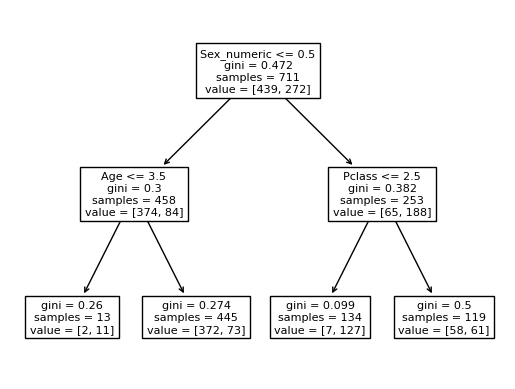

In [150]:
tree.plot_tree(model_0, feature_names=list(x.columns))

### Evaluting the model performance

In [119]:
import numpy as np

In [120]:
scores['TP'] = np.where((scores['pred'] == 1) & (scores['label'] == 1), 1, 0)

In [121]:
scores['TN'] = np.where((scores['pred'] == 0) & (scores['label'] == 0), 1, 0)

In [122]:
scores['FP'] = np.where((scores['pred'] == 1) & (scores['label'] == 0), 1, 0)

In [123]:
scores['FN'] = np.where((scores['pred'] == 0) & (scores['label'] == 1), 1, 0)

In [124]:
# recall
scores['TP'].sum() / (scores['TP'].sum() + scores['FN'].sum())

0.6617647058823529

In [125]:
# precision
scores['TP'].sum() / (scores['TP'].sum() + scores['FP'].sum())

0.703125

In [126]:
# accuracy
(scores['TP'].sum() + scores['TN'].sum()) / len(scores)

0.7640449438202247

Scikit-learn also has built-in functions that we can use

In [127]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [128]:
acc = accuracy_score(y_valid, y_pred)
print("Accuracy: {:.2f}%".format(acc*100))

Accuracy: 76.40%


In [129]:
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')

In [130]:
precision, recall, f1

(0.703125, 0.6617647058823529, 0.6818181818181819)

### Try other hyperparameters

First let's make the tree more complex by adding one more level

In [131]:
model_1 = tree.DecisionTreeClassifier(max_depth=3)

In [132]:
model_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [133]:
y_pred = model_1.predict(X_valid)

In [134]:
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')

In [135]:
precision, recall, f1

(0.8181818181818182, 0.6617647058823529, 0.7317073170731708)

Then let's make the tree even more complex

In [136]:
model_2 = tree.DecisionTreeClassifier(max_depth=5)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_valid)
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(precision, recall, f1)

0.7346938775510204 0.5294117647058824 0.6153846153846154


### Grid search to find the best hyperparameters

In [137]:
from sklearn.model_selection import GridSearchCV

In [147]:
param_grid = {'max_depth': [1, 2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5]}

model = tree.DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1')

# Fit the grid search to the data
grid_search.fit(x, y)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 3, 'min_samples_split': 2}


In [148]:
best_model = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=2)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)
precision, recall, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average='binary')
print(precision, recall, f1)

0.8181818181818182 0.6617647058823529 0.7317073170731708
